In [10]:
# Import Dependencies and Twitter API Keys
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
#Target users 
target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']

# create variables to hold all the sentiments arrays, users, timestamp, tweets count
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

# Gather the tweets and run vader on them

#Loop through 5 target users
for target_user in target_users:
    # create variables to hold temp the sentiments arrays, users, timestamp, tweets count
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
    
     # Get all tweets from home feed, loop through 5 pages of tweets (100 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(target_user, page=x)
        # loop through the tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Add each value to the appropriate list
            user_list.append(tweet["user"]["screen_name"])
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweets_ago_list.append(tweet_count)
            tweet_count += 1
      
    # Add each value to the consolidated list       
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)

    # Store the Average of compound Sentiments    
    sentiments = np.mean(compound_list)
    all_sentiment_list.append(sentiments)

In [12]:
#Flatten each list of user variables to consolidate list example: a = np.array([[1,2], [3,4]])>>> a.flatten() 
#array([1, 2, 3, 4]) 

all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [13]:
#Create Dictionary of above variables
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 
             'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 
             'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
#Convert Dictionary to data frame
sentiment_df = pd.DataFrame(sentiment)

# Export Dataframe to CSV
sentiment_df.to_csv("Twitter_News_Sentiment_Raw.csv", index=False, header=True)
#Display DataFrame
sentiment_df

    

,Compound_Score,Neg_Score,Neu_Score,Pos_Score,Timestamp,Tweet_Text,Tweets_Ago,User
0,0.0000,0.000,1.000,0.000,Sun Jun 24 19:17:37 +0000 2018,Trump calls for deportations without judicial ...,0,BBCWorld
1,-0.3612,0.333,0.667,0.000,Sun Jun 24 18:55:57 +0000 2018,Europe migrants: Italy warns Schengen is 'at r...,1,BBCWorld
2,-0.6705,0.360,0.640,0.000,Sun Jun 24 17:44:07 +0000 2018,Mali Fula villagers were killed 'in cold blood...,2,BBCWorld
3,0.4588,0.000,0.769,0.231,Sun Jun 24 17:02:54 +0000 2018,Event in Dublin for 60 years of UN peacekeepin...,3,BBCWorld
4,-0.7906,0.467,0.533,0.000,Sun Jun 24 16:48:00 +0000 2018,A juvenile male has been arrested over Tallagh...,4,BBCWorld
5,-0.3802,0.126,0.874,0.000,Sun Jun 24 16:43:57 +0000 2018,RT @bbctennis: He’s done it!\n\nCilic defeats ...,5,BBCWorld
6,0.0000,0.000,1.000,0.000,Sun Jun 24 15:54:59 +0000 2018,Erdogan leads after early results in Turkey ht...,6,BBCWorld
7,0.0000,0.000,1.000,0.000,Sun Jun 24 15:22:40 +0000 2018,Lava from Hawaii's Kilauea volcano creeps clos...,7,BBCWorld
8,0.4574,0.000,0.834,0.166,Sun Jun 24 13:53:17 +0000 2018,RT @BBCSport: FT #ENG 6-1 #PAN \n\nKane ⚽⚽⚽\nS...,8,BBCWorld
9,0.0000,0.000,1.000,0.000,Sun Jun 24 13:38:10 +0000 2018,RT @BBCSport: GOAL! #ENG 6-1 #PAN \n\nComeback...,9,BBCWorld


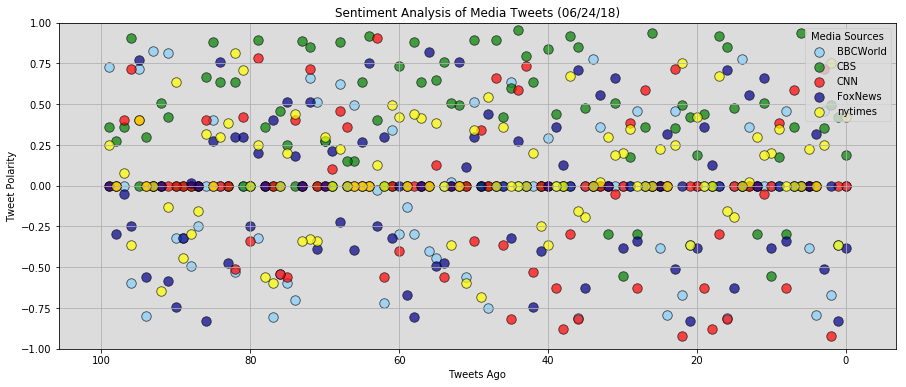

In [14]:
#Get unique users from the list
users = sentiment_df['User'].unique()
#Define the colors for the graph
colors = ['lightskyblue', 'green', 'red','darkblue','yellow']

#Create scatter plot for each user going through loop
for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,
                c = colors[i], label = users[i],
                alpha = .7, edgecolor = 'black', linewidth = .8)


# create the titles, legends, and axis
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (06/24/18)")
plt.legend(title="Media Sources", loc='upper right')
plt.grid()
plt.gcf().set_size_inches(15, 6)
plt.rcParams['axes.facecolor'] = 'gainsboro'

# Set the limits of the x axis
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])

# Set the limits of the x axis
plt.ylim(-1, 1)
#Save the figure as png format
plt.savefig("Sentiment_Analysis_Tweets.png")
#Display the graph
plt.show()

In [15]:
#Create new dictionary for each user with average compound score 
avg_sentiment  = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
#Convert dictionary to data frame
avg_sentiment_df = pd.DataFrame(avg_sentiment)
# Display Dataframe
avg_sentiment_df

,Avg_Compound_Score,User
0,-0.039626,@BBCWorld
1,0.337030,@CBS
2,-0.020472,@CNN
3,-0.020590,@FoxNews
4,0.079319,@nytimes


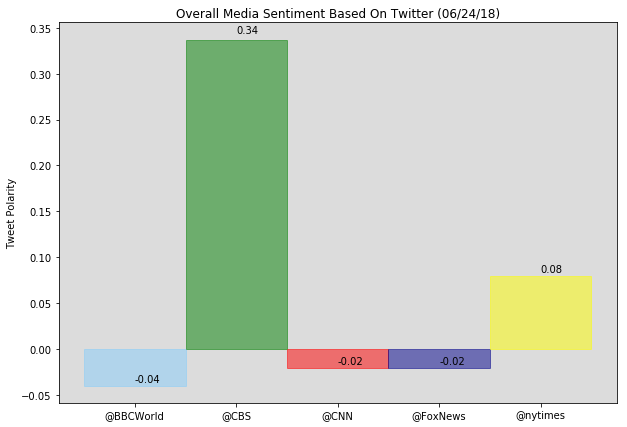

In [16]:
# create x_axis
x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 7))

#Create plotbar
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)

# Create the ticks for our bar chart's x axis
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")

#Set Labels, title
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based On Twitter (06/24/18)")

# add data labels
x = range(0,len(avg_sentiment_df["User"]))
y = round(avg_sentiment_df["Avg_Compound_Score"], 2)
for a,b in zip(x, y):
    plt.text(a, b + .004, str(b))

#Save graph in png format
plt.savefig("Overall_Media_Sentiment.png")

#Display graph
plt.show()